# 1. Discrete Visualization

In this section of visualization practice, I will analyze and visualize the international visitation data to various states in the United States over a three-year period, from 2016 to 2019. My objective is to extract meaningful insights that could inform strategies for enhancing tourism across the country.

For this analysis, I will consolidate data from three sources: US_States_Visited_2017.xlsx, US_States_Visited_2018.xlsx, and US_States_Visited_2019.xlsx. Each dataset provides information on the number of international visitors to different states in the U.S., with the year indicated in the file name referencing when the data was released. Notably, the visitation numbers will be adjusted by multiplying by 1,000 to ensure accuracy. After cleaning and merging these datasets, I will create a comprehensive dataframe titled merged_US_states_visitation. This dataframe will include columns for each state, alongside visitation data for the years 2016 through 2019, with all states listed in alphabetical order. This refined dataset will serve as the foundation for my visualization efforts aimed at uncovering trends and insights within U.S. international tourism visitation data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

def load_data() -> pd.DataFrame:
    ''' This function should load the data as described in the assignment description
    '''
    # Retrieving 2016 and 2017 data
    df_2016_2017 = pd.read_excel('assets/US_States_Visited_2017.xlsx', skiprows=6, skipfooter=13)
    df_16_17 = df_2016_2017[[' VISITATION (2)', '(000)', '(000).1']].rename(columns = {' VISITATION (2)':'state','(000)':'visitation_2016','(000).1':'visitation_2017'})
    df_16_17['state'] = df_16_17['state'].str.strip()
    
    # Retrieving 2018 data
    df_2018 = pd.read_excel('assets/US_States_Visited_2018.xlsx', skiprows=7, skipfooter=7)
    df_18 = df_2018[[' VISITATION','(000)']].rename(columns = {' VISITATION': 'state', '(000)':'visitation_2018'})
    df_18['state'] = df_18['state'].str.strip()
    
    # Retrieving 2019 data
    df_2019 =  pd.read_excel('assets/US_States_Visited_2019.xlsx', skiprows=6, skipfooter=8)
    df_19 = df_2019[[' VISITATION', '000']].rename(columns={' VISITATION':'state', '000':'visitation_2019'})
    df_19['state'] = df_19['state'].str.strip()
    
    # Merging all 3 dataframes and muliply visitor number by 1000
    df = pd.merge(df_16_17, df_18, on='state', how='outer').merge(df_19, on='state', how='outer')
    df.iloc[:,1:5] = df.iloc[:,1:5] * 1000
    merged_US_states_visitation = df.sort_values(by='state').reset_index(drop=True)
    merged_US_states_visitation
    
    return merged_US_states_visitation

## 1. Bar Chart 

I will generate four bar charts using the compiled visitation data, each representing one year from 2016 to 2019. These charts will compare the total international visitation numbers for U.S. states, with states on the x-axis and visitation counts on the y-axis. Each chart will be adjusted for readability and titled by the year it represents, such as "Visitation Data 2016." To highlight key insights, markers will be placed on the bars indicating the highest and lowest visitation figures for each year, providing a clear visual differentiation of tourism trends across the states over the four-year span.

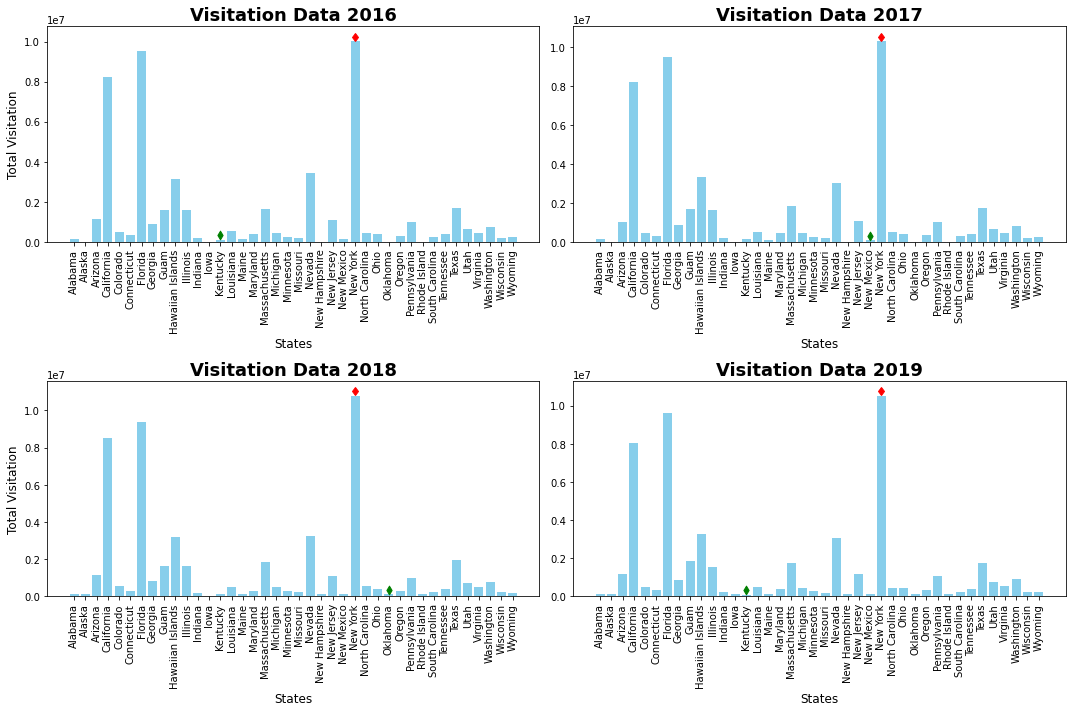

In [2]:
def make_bar_chart(data):
    width = 0.8
    df = load_data()

    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(221)

    x = df['state']
    y = df['visitation_2016']

    y_max_lst = []
    y_max = df.loc[y == y.max()].index[0]
    y_max_lst.append(y_max)
    y_low = df.loc[y == y.min()].index[0]
    x_low = df.loc[y == y.min(), 'state'].iloc[0]


    ax.bar(x, y, width=width, color ='#87CEEB')
    ax.set_xticklabels(x, rotation=90)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax.set_ylabel('Total Visitation', fontsize=12)
    ax.set_xlabel('States', fontsize=12)
    ax.set_title('Visitation Data 2016', fontsize=18, fontweight='bold')
    ax.plot(x, y+230000, linestyle='', marker='d', markevery=y_max_lst, color='r')
    ax.scatter(x_low, y[y_low]+230000, s=38, c='g', marker='d', zorder=3)

    ax1 = fig.add_subplot(222)

    y1 = df['visitation_2017']

    y1_max_lst = []
    y1_max = df.loc[y1 == y1.max()].index[0]
    y1_max_lst.append(y1_max)
    y1_low = df.loc[y1 == y1.min()].index[0]
    x1_low = df.loc[y1 == y1.min(), 'state'].iloc[0]


    ax1.bar(x, y1, width=width, color ='#87CEEB')
    ax1.set_xticklabels(x, rotation=90)
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax1.set_xlabel('States', fontsize=12)
    ax1.set_title('Visitation Data 2017', fontsize=18, fontweight='bold')
    ax1.plot(x, y1+230000, linestyle='', marker='d', markevery=y1_max_lst, color='r')
    ax1.scatter(x1_low, y1[y1_low]+230000, s=38, c='g', marker='d', zorder=3)

    ax2 = fig.add_subplot(223)

    y2 = df['visitation_2018']

    y2_max_lst = []
    y2_max = df.loc[y2 == y2.max()].index[0]
    y2_max_lst.append(y2_max)
    y2_low = df.loc[y2 == y2.min()].index[0]
    x2_low = df.loc[y2 == y2.min(), 'state'].iloc[0]


    ax2.bar(x, y2, width=width, color ='#87CEEB')
    ax2.set_xticklabels(x, rotation=90)
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax2.set_ylabel('Total Visitation', fontsize=12)
    ax2.set_xlabel('States', fontsize=12)
    ax2.set_title('Visitation Data 2018', fontsize=18, fontweight='bold')
    ax2.plot(x, y2+230000, linestyle='', marker='d', markevery=y2_max_lst, color='r')
    ax2.scatter(x2_low, y2[y2_low]+230000, s=38, c='g', marker='d', zorder=3)


    ax3 = fig.add_subplot(224)

    y3 = df['visitation_2019']

    y3_max_lst = []
    y3_max = df.loc[y3 == y3.max()].index[0]
    y3_max_lst.append(y3_max)
    y3_low = df.loc[y3 == y3.min()].index[0]
    x3_low = df.loc[y3 == y3.min(), 'state'].iloc[0]


    ax3.bar(x, y3, width=width, color ='#87CEEB')
    ax3.set_xticklabels(x, rotation=90)
    ax3.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax3.set_xlabel('States', fontsize=12)
    ax3.set_title('Visitation Data 2019', fontsize=18, fontweight='bold')
    ax3.plot(x, y3+230000, linestyle='', marker='d', markevery=y3_max_lst, color='r')
    ax3.scatter(x3_low, y3[y3_low]+230000, s=38, c='g', marker='d', zorder=3)


    plt.tight_layout()
    plt.show()
    return None

make_bar_chart(load_data())

## 2. Bar Chart of Log Transformed Metric
I implemented a logarithmic transformation to the visitation data as the initial visualizations were skewed, making it difficult to discern trends in states with lower visitation numbers. The purpose of this approach was to better visualize the nuances in visitation figures across all states, especially those with smaller numbers.

In the revised bar charts, each state's visitation numbers for the years 2016 to 2019 are log-transformed using a base of 10. This transformation helps in reducing the scale's skewness, making the variations in visitation data more apparent and easier to compare across states. To address the challenge of identifying the states with the highest and lowest visitation figures post-transformation, I have employed markers and/or sorting within the visualizations. These markers clearly highlight the states with highest tourist visit.

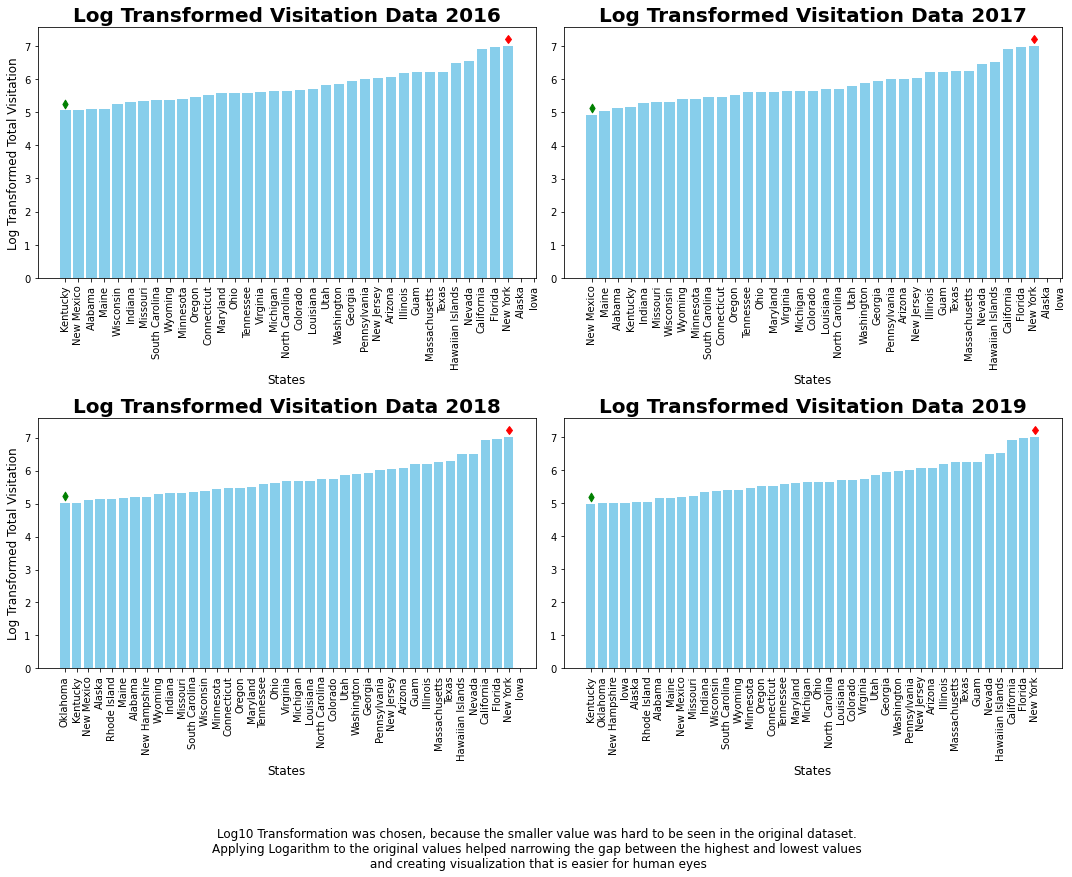

In [ ]:
def make_transformed_bar_chart(data):   
    width = 0.8
    df = load_data()
    fig = plt.figure(figsize=(15,11))

    #1st plot
    ax = fig.add_subplot(221)

    df_sorted = df.assign(y_log10=np.log10(df['visitation_2016'])).sort_values(by='y_log10').reset_index(drop=True)
    x = df_sorted['state']
    y = df_sorted['y_log10']

    y_max_lst = []
    y_max = df_sorted.loc[y == y.max()].index[0]
    y_max_lst.append(y_max)
    y_low = df_sorted.loc[y == y.min()].index[0]
    x_low = df_sorted.loc[y == y.min(), 'state'].iloc[0]

    ax.bar(x, y, width=width, color ='#87CEEB')
    ax.set_xticklabels(x, rotation=90)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax.set_ylabel('Log Transformed Total Visitation', fontsize=12)
    ax.set_xlabel('States', fontsize=12)
    ax.set_title('Log Transformed Visitation Data 2016', fontsize=20, fontweight='bold')
    ax.plot(x, y+0.2, linestyle='', marker='d', markevery=y_max_lst, color='r')
    ax.scatter(x_low, y[y_low]+0.2, s=38, c='g', marker='d', zorder=3)


    #2nd plot
    ax1 = fig.add_subplot(222)

    df_sorted1 = df.assign(y_log10=np.log10(df['visitation_2017'])).sort_values(by='y_log10').reset_index(drop=True)
    x1 = df_sorted1['state']
    y1 = df_sorted1['y_log10']

    y1_max_lst = []
    y1_max = df_sorted1.loc[y1 == y1.max()].index[0]
    y1_max_lst.append(y1_max)
    y1_low = df_sorted1.loc[y1 == y1.min()].index[0]
    x1_low = df_sorted1.loc[y1 == y1.min(), 'state'].iloc[0]

    ax1.bar(x1, y1, width=width, color ='#87CEEB')
    ax1.set_xticklabels(x1, rotation=90)
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax1.set_xlabel('States', fontsize=12)
    ax1.set_title('Log Transformed Visitation Data 2017', fontsize=20, fontweight='bold')
    ax1.plot(x1, y1+0.2, linestyle='', marker='d', markevery=y1_max_lst, color='r')
    ax1.scatter(x1_low, y1[y1_low]+0.2, s=38, c='g', marker='d', zorder=3)


    #3rd plot
    ax2 = fig.add_subplot(223)

    df_sorted2 = df.assign(y_log10=np.log10(df['visitation_2018'])).sort_values(by='y_log10').reset_index(drop=True)
    x2 = df_sorted2['state']
    y2 = df_sorted2['y_log10']

    y2_max_lst = []
    y2_max = df_sorted2.loc[y2 == y2.max()].index[0]
    y2_max_lst.append(y2_max)
    y2_low = df_sorted2.loc[y2 == y2.min()].index[0]
    x2_low = df_sorted2.loc[y2 == y2.min(), 'state'].iloc[0]

    ax2.bar(x2, y2, width=width, color ='#87CEEB')
    ax2.set_xticklabels(x2, rotation=90)
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax2.set_ylabel('Log Transformed Total Visitation', fontsize=12)
    ax2.set_xlabel('States', fontsize=12)
    ax2.set_title('Log Transformed Visitation Data 2018', fontsize=20, fontweight='bold')
    ax2.plot(x2, y2+0.2, linestyle='', marker='d', markevery=y2_max_lst, color='r')
    ax2.scatter(x2_low, y2[y2_low]+0.2, s=38, c='g', marker='d', zorder=3)


    #4th plot
    ax3 = fig.add_subplot(224)

    df_sorted3 = df.assign(y_log10=np.log10(df['visitation_2019'])).sort_values(by='y_log10').reset_index(drop=True)
    x3 = df_sorted3['state']
    y3 = df_sorted3['y_log10']

    y3_max_lst = []
    y3_max = df_sorted3.loc[y3 == y3.max()].index[0]
    y3_max_lst.append(y3_max)
    y3_low = df_sorted3.loc[y3 == y3.min()].index[0]
    x3_low = df_sorted3.loc[y3 == y3.min(), 'state'].iloc[0]


    ax3.bar(x3, y3, width=width, color ='#87CEEB')
    ax3.set_xticklabels(x3, rotation=90)
    ax3.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax3.set_xlabel('States', fontsize=12)
    ax3.set_title('Log Transformed Visitation Data 2019', fontsize=20, fontweight='bold')
    ax3.plot(x3, y3+0.2, linestyle='', marker='d', markevery=y3_max_lst, color='r')
    ax3.scatter(x3_low, y3[y3_low]+0.2, s=38, c='g', marker='d', zorder=3)


    plt.tight_layout()
    plt.figtext(0.5, -0.1, 'Log10 Transformation was chosen, because the smaller value was hard to be seen in the original dataset.\nApplying Logarithm to the original values helped narrowing the gap between the highest and lowest values\n and creating visualization that is easier for human eyes', ha='center', fontsize=12)
    
    plt.show()
    return None

make_transformed_bar_chart(load_data())